In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# read csv
df = pd.read_csv('go_outside/csi_data.csv')

In [3]:
def parse_data(data_string):
    return data_string[1:-1].split(',')

In [4]:
df['data'] = df['data'].apply(parse_data)

In [5]:
df

,type,id,mac,rssi,rate,sig_mode,mcs,bandwidth,smoothing,not_sounding,...,ampdu_cnt,channel,secondary_channel,local_timestamp,ant,sig_len,rx_state,len,first_word,data
0,CSI_DATA,35317,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,589967113,0,100,0,128,0,"[0, 0, 2, -12, 1, -11, 1, -11, 0, -8, -1, -7, ..."
1,CSI_DATA,35318,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,590005601,0,100,0,128,0,"[0, 0, -8, -10, -8, -9, -7, -8, -6, -6, -5, -4..."
2,CSI_DATA,35319,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,590018369,0,100,0,128,0,"[0, 0, 9, 7, 9, 6, 7, 5, 7, 4, 5, 2, 3, 0, 2, ..."
3,CSI_DATA,35320,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,590029560,0,100,0,128,0,"[0, 0, -4, -11, -4, -10, -4, -9, -4, -7, -4, -..."
4,CSI_DATA,35321,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,590039338,0,100,0,128,0,"[0, 0, 12, 1, 11, 0, 9, 0, 8, -1, 5, -2, 2, -2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,CSI_DATA,42101,d0:15:a6:d5:17:16,-59,11,1,7,0,0,1,...,0,1,0,704646460,0,100,0,128,0,"[0, 0, 8, 17, 7, 16, 7, 14, 7, 12, 7, 9, 6, 7,..."
6785,CSI_DATA,42102,d0:15:a6:d5:17:16,-59,11,1,7,0,0,1,...,0,1,0,704669508,0,100,0,128,0,"[0, 0, 7, -18, 5, -18, 6, -18, 4, -15, 3, -13,..."
6786,CSI_DATA,42103,d0:15:a6:d5:17:16,-59,11,1,7,0,0,1,...,0,1,0,704679897,0,100,0,128,0,"[0, 0, 18, -3, 16, -3, 15, -4, 13, -4, 11, -5,..."
6787,CSI_DATA,42104,d0:15:a6:d5:17:16,-58,11,1,7,0,0,1,...,0,1,0,704696261,0,100,0,128,0,"[0, 0, -13, 14, -12, 13, -11, 13, -9, 12, -7, ..."


In [6]:
df.columns

Index(['type', 'id', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'len', 'first_word',
       'data'],
      dtype='object')

In [38]:
all(df['len'] == df['data'].apply(len))

True

In [54]:
CSI_data = df['data']

In [55]:
CSI_data = CSI_data.apply(lambda data: [complex(int(data[i]), int(data[i+1])) for i in range(0, len(data), 2)]).to_list()


In [59]:
CSI_data = np.array(CSI_data)
CSI_data.shape, CSI_data.dtype

((6789, 64), dtype('complex128'))

In [41]:
CSI_data.shape

(6789,)

In [16]:
from mpl_toolkits import axes_grid1


In [60]:
CSI_amplitude = np.abs(CSI_data)
CSI_amplitude.shape, CSI_amplitude.dtype

((6789, 64), dtype('float64'))

In [17]:
def add_colorbar(im, ax, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(ax)
    width = axes_grid1.axes_size.AxesY(ax, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    cax = divider.new_horizontal(size=width, pad=pad, pack_start=False)
    ax.figure.add_axes(cax)
    return ax.figure.colorbar(im, cax=cax, **kwargs)


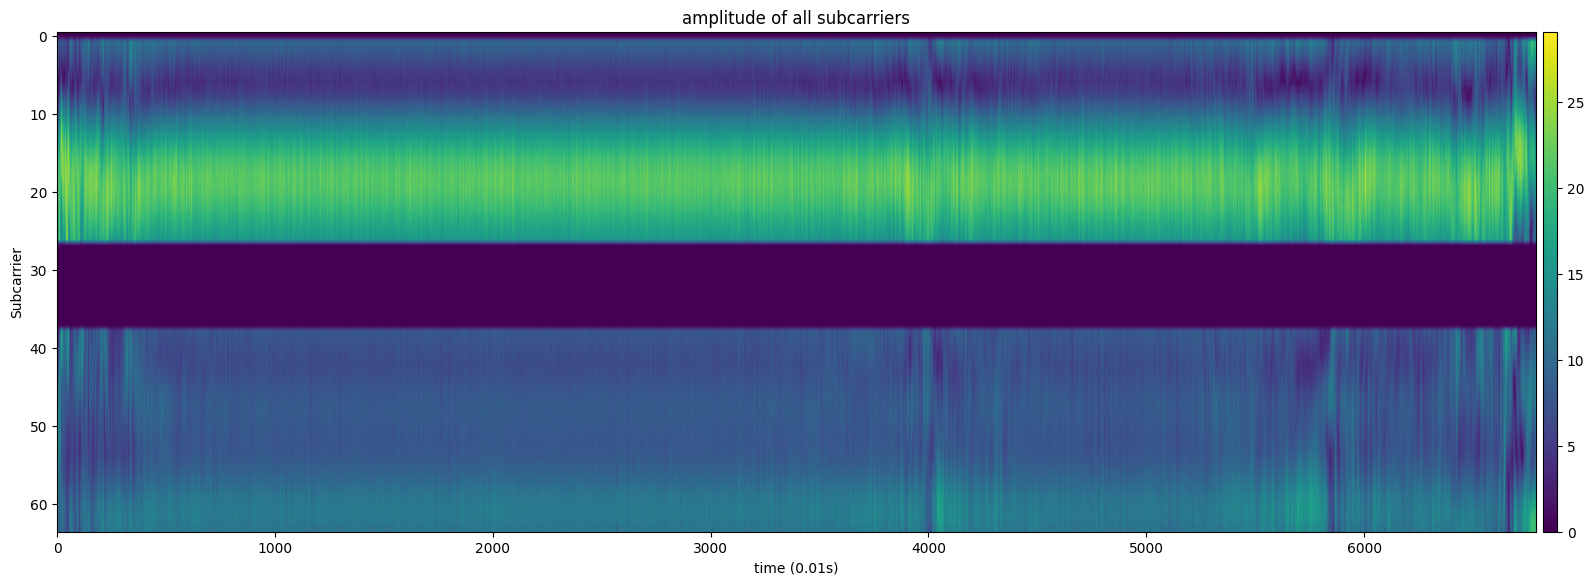

In [61]:
visualize_amp_allsubcarriers = CSI_amplitude


fig, ax1 = plt.subplots(1, 1, figsize=(1, 1))
plt.subplots_adjust(left=0.0, bottom=0.0, top=5, right=15)

im1 = ax1.imshow(visualize_amp_allsubcarriers.transpose(1, 0), aspect='auto')
ax1.set_title('amplitude of all subcarriers')
ax1.set_xlabel('time (0.01s)')
ax1.set_ylabel('Subcarrier')

add_colorbar(im1, ax1, aspect=1)

plt.show()


In [23]:
(df['local_timestamp'])

0       589967113
1       590005601
2       590018369
3       590029560
4       590039338
          ...    
6784    704646460
6785    704669508
6786    704679897
6787    704696261
6788    704717439
Name: local_timestamp, Length: 6789, dtype: int64

In [34]:
(590018369 - 590005601)/1000000

0.012768

In [24]:
20*df['len']

0       2560
1       2560
2       2560
3       2560
4       2560
        ... 
6784    2560
6785    2560
6786    2560
6787    2560
6788    2560
Name: len, Length: 6789, dtype: int64

In [31]:
df['local_timestamp'][:500]

0      589967113
1      590005601
2      590018369
3      590029560
4      590039338
         ...    
495    598561178
496    598585017
497    598594627
498    598644639
499    598661627
Name: local_timestamp, Length: 500, dtype: int64

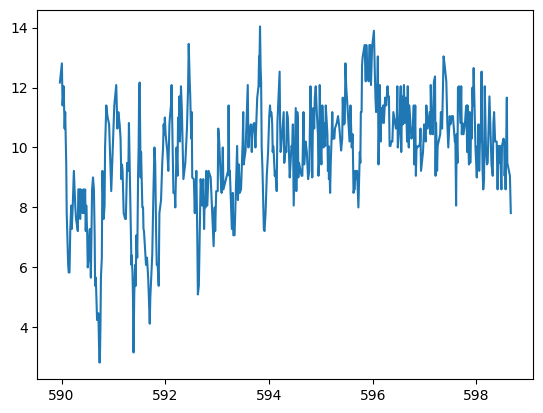

In [64]:
plt.plot(df['local_timestamp'][:500]/1000000, CSI_amplitude[:500, 1])